In [1]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import pickle as pk
from text_processing import textProcessing
import json
import os
from IPython.display import Image as ImageD
from IPython.display import display
import random 

Using TensorFlow backend.


In [2]:
labels = np.load('labels.npy')
print(labels)

['person' 'bicycle' 'car' 'motorcycle' 'airplane' 'bus' 'train' 'truck'
 'boat' 'traffic light' 'fire hydrant' 'stop sign' 'parking meter' 'bench'
 'bird' 'cat' 'dog' 'horse' 'sheep' 'cow' 'elephant' 'bear' 'zebra'
 'giraffe' 'backpack' 'umbrella' 'handbag' 'tie' 'suitcase' 'frisbee'
 'skis' 'snowboard' 'sports ball' 'kite' 'baseball bat' 'baseball glove'
 'skateboard' 'surfboard' 'tennis racket' 'bottle' 'wine glass' 'cup'
 'fork' 'knife' 'spoon' 'bowl' 'banana' 'apple' 'sandwich' 'orange'
 'broccoli' 'carrot' 'hot dog' 'pizza' 'donut' 'cake' 'chair' 'couch'
 'potted plant' 'bed' 'dining table' 'toilet' 'tv' 'laptop' 'mouse'
 'remote' 'keyboard' 'cell phone' 'microwave' 'oven' 'toaster' 'sink'
 'refrigerator' 'book' 'clock' 'vase' 'scissors' 'teddy bear' 'hair drier'
 'toothbrush']


In [3]:
CNN_model = load_model('best_model_cnn.h5')
RNN_model = load_model('best_model_rnn.h5')
with open('tokenizer.pickle','rb') as file:
    tokenizer = pk.load(file)

W1207 16:41:10.751245 4724673984 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1207 16:41:13.601690 4724673984 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1207 16:41:13.783834 4724673984 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:3794: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops

In [4]:
# Hardcoded values for our dataset
max_length = 43
vocab_size = 18976

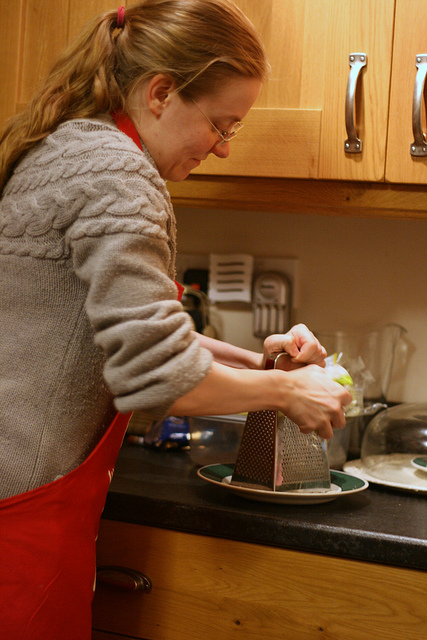

In [35]:
test_img_name = 'COCO_train2014_000000465466.jpg'
display(ImageD(filename = 'test/'+test_img_name))

img = Image.open('test/'+test_img_name)
img = img.resize((128,128), Image.ANTIALIAS)
arr = np.array(img)
arr=np.expand_dims(arr,0)
arr=arr/255

In [36]:
with open("test_captions.json", 'r') as file:
    testcap = json.load(file)
print(testcap[test_img_name])

['woman with red apron standing in the kitchen and using grater', 'smiling woman grating food in the kitchen', 'woman is grating piece of cheese with grater', 'girl is working on putting food together', 'woman preparing food in kitchen on counter']


In [37]:
CNN_Predict = CNN_model.predict(arr)[0]
CNN_Predict_test = CNN_Predict*100
CNN_Predict_test = np.array([int(x) for x in CNN_Predict_test])
for i in range(len(CNN_Predict_test)):
    if CNN_Predict_test[i]>10:
        print(labels[i])
    elif CNN_Predict_test[i]>5:
        print("Probably ->",labels[i])

person
bottle
Probably -> cup
Probably -> chair


In [38]:
CaptionGenerated = textProcessing.generate_desc(RNN_model, tokenizer, np.array([CNN_Predict]), max_length)
CaptionGenerated

'startseq is and on down of woman endseq'